In [1]:
from feature_engeeniring import * 
from functions import *
from pipeline_gatehering import GatheringData

from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.rcParams['figure.figsize'] = [20,8]
warnings.filterwarnings('ignore')

import pickle

import mlflow
import logging

# logging.basicConfig(level=logging.WARN)
# logger = logging.getLogger(__name__)

In [2]:
experiment_name = 'train without shifted Close'
experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
experiment_id

'1'

In [ ]:
%%time
kw_list = [
          'bitcoin', 
          'bitcoin price',
          'bitcoin usd',
          'bitcoin kurs',
            'Bitcoin.com',
            'Bitcoin Gold',
           'BTC-USD',     
            'Bitcoin Cash',
           'binance',
    
    
            'cryptocurrency',
            'cryptocurrency bitcoin',
           'news cryptocurrency',
           'crypto',
           'buy bitcoin',
           'bitcoin stock',
           'best cryptocurrency',
           'cryptocurrency market',
           'buy cryptocurrency',
           'what is cryptocurrency',
           'cryptocurrency exchange',
          ]

kw_list_yahoo = ['BTC-USD']


get_data = GatheringData()
df_trends = get_data.get_from_google_trends(kw_list=kw_list, resample='D')
df_yahoo = get_data.get_from_yahoo(kw_list=kw_list_yahoo)
df_resulting = get_data.get_resulting_from_sources()
# df_resulting = get_data.drop_columns_result_data(columns=)

In [ ]:
# df_resulting.head()
columns_drop = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
df_resulting = get_data.drop_columns_result_data(columns=columns_drop)
df_resulting.head()

In [5]:
df_resulting.to_csv('../../data_dm/eduard/df_resulting.csv')

# Showing dataset after gathering data from our sources

In [5]:
df_resulting = pd.read_csv('../../data_dm/eduard/df_resulting.csv', header=0, index_col=0, parse_dates=True, dtype='float32')
df_resulting.head()

Close  bitcoin  bitcoin price  bitcoin usd  bitcoin kurs  \
2016-04-10  421.563995      2.0            1.0          2.0           1.0   
2016-04-11  422.483002      NaN            NaN          NaN           NaN   
2016-04-12  425.190002      NaN            NaN          NaN           NaN   
2016-04-13  423.734009      NaN            NaN          NaN           NaN   
2016-04-14  424.282013      NaN            NaN          NaN           NaN   

            Bitcoin.com  Bitcoin Gold  BTC-USD  Bitcoin Cash  binance  ...  \
2016-04-10          2.0           1.0     21.0           0.0      0.0  ...   
2016-04-11          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-12          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-13          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-14          NaN           NaN      NaN           NaN      NaN  ...   

            cryptocurrency bitcoin  news cryptocurrency  crypto  buy bitcoin  \
2016-04-10                     1.0                  0.0     2.0          2.0   
2016-04-11                     NaN                  NaN     NaN          NaN   
2016-04-12                     NaN                  NaN     NaN          NaN   
2016-04-13                     NaN                  NaN     NaN          NaN   
2016-04-14                     NaN                  NaN     NaN          NaN   

            bitcoin stock  best cryptocurrency  cryptocurrency market  \
2016-04-10            0.0                  0.0                    1.0   
2016-04-11            NaN                  NaN                    NaN   
2016-04-12            NaN                  NaN                    NaN   
2016-04-13            NaN                  NaN                    NaN   
2016-04-14            NaN                  NaN                    NaN   

            buy cryptocurrency  what is cryptocurrency  \
2016-04-10                 0.0                     0.0   
2016-04-11                 NaN                     NaN   
2016-04-12                 NaN                     NaN   
2016-04-13                 NaN                     NaN   
2016-04-14                 NaN                     NaN   

            cryptocurrency exchange  
2016-04-10                      1.0  
2016-04-11                      NaN  
2016-04-12                      NaN  
2016-04-13                      NaN  
2016-04-14                      NaN  

[5 rows x 21 columns]

In [6]:
df_resulting.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2016-04-10 to 2021-04-11
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Close                    1824 non-null   float32
 1   bitcoin                  260 non-null    float32
 2   bitcoin price            260 non-null    float32
 3   bitcoin usd              260 non-null    float32
 4   bitcoin kurs             260 non-null    float32
 5   Bitcoin.com              260 non-null    float32
 6   Bitcoin Gold             260 non-null    float32
 7   BTC-USD                  260 non-null    float32
 8   Bitcoin Cash             260 non-null    float32
 9   binance                  260 non-null    float32
 10  cryptocurrency           260 non-null    float32
 11  cryptocurrency bitcoin   260 non-null    float32
 12  news cryptocurrency      260 non-null    float32
 13  crypto                   260 non-null    float32
 14  buy bi

# Preparing data and show dataset after preparation

In [7]:
columns_results = df_resulting.columns.to_list()

columns_TranformTimeSeries = columns_results#['Close']
columns_Lags = columns_results
columns_RollingMeanAverage = columns_results
columns_RollingStdAverage = columns_results
columns_RollingMeanExponential = columns_results
columns_RollingStdExponential = columns_results
columns_DinamicsForTimeSeries = ['Close']
lags = 4
com = 0.8
window = 7

pipeline = Pipeline([('Interpolation', Interpolation()),
    
                    ('TranformTimeSeries', TranformTimeSeries(box_cox=columns_TranformTimeSeries)),
                     
                    ('Lags',Lags(lags=lags, 
                                 columns=columns_Lags)),
                      
                    ('RollingMeanAverage', RollingMeanAverage(window=window,
                                                              columns=columns_RollingMeanAverage)),
                      
                    ('RollingStdAverage', RollingStdAverage(window=window, 
                                                            columns=columns_RollingStdAverage)),
                      
                    ('RollingMeanExponential', RollingMeanExponential(window=window, 
                                                                      com=com,
                                                                      columns=columns_RollingMeanExponential)),
                      
                    ('RollingStdExponential', RollingStdExponential(window=window, 
                                                                    com=com,
                                                                    columns=columns_RollingStdExponential)),
                    ('DayWeekYear', DayWeekYear()),
                    ('DinamicsForTimeSeries', DinamicsForTimeSeries(columns=columns_DinamicsForTimeSeries))])

pipeline.fit(df_resulting)
X_transformed = pipeline.transform(df_resulting)
X_transformed.head()

boxcox column:	Close
boxcox column:	bitcoin
boxcox column:	bitcoin price
boxcox column:	bitcoin usd
boxcox column:	bitcoin kurs
boxcox column:	Bitcoin.com
boxcox column:	Bitcoin Gold
boxcox column:	BTC-USD
boxcox column:	Bitcoin Cash
boxcox column:	binance
boxcox column:	cryptocurrency
boxcox column:	cryptocurrency bitcoin
boxcox column:	news cryptocurrency
boxcox column:	crypto
boxcox column:	buy bitcoin
boxcox column:	bitcoin stock
boxcox column:	best cryptocurrency
boxcox column:	cryptocurrency market
boxcox column:	buy cryptocurrency
boxcox column:	what is cryptocurrency
boxcox column:	cryptocurrency exchange


Close   bitcoin  bitcoin price  bitcoin usd  bitcoin kurs  \
2016-04-28  10.161176  1.192367            0.0     0.672756      0.000000   
2016-04-29  10.195832  1.152480            0.0     0.672756      0.000000   
2016-04-30  10.157205  1.110723            0.0     0.672756      0.000000   
2016-05-01  10.177534  1.066915            0.0     0.672756      0.000000   
2016-05-02  10.136208  1.020853            0.0     0.672756     -0.151967   

            Bitcoin.com  Bitcoin Gold   BTC-USD  Bitcoin Cash   binance  ...  \
2016-04-28     0.955345      0.000000 -2.139719     -1.780741 -4.464683  ...   
2016-04-29     0.885540      0.000000 -2.139719     -1.780741 -4.464683  ...   
2016-04-30     0.811989      0.000000 -2.139719     -1.780741 -4.464683  ...   
2016-05-01     0.734220      0.000000 -2.139719     -1.780741 -4.464683  ...   
2016-05-02     0.563620     -0.154421 -2.139719     -1.780741 -4.464683  ...   

            best cryptocurrency_ewn_std_7  cryptocurrency market_ewn_std_7  \
2016-04-28                       0.000000                         0.296626   
2016-04-29                       0.000000                         0.301408   
2016-04-30                       0.000000                         0.289684   
2016-05-01                       0.000000                         0.269263   
2016-05-02                       0.156015                         0.197129   

            buy cryptocurrency_ewn_std_7  what is cryptocurrency_ewn_std_7  \
2016-04-28                           0.0                          0.257109   
2016-04-29                           0.0                          0.268747   
2016-04-30                           0.0                          0.265229   
2016-05-01                           0.0                          0.252819   
2016-05-02                           0.0                          0.168471   

            cryptocurrency exchange_ewn_std_7  weak  month  year  weekDay  \
2016-04-28                           0.275281    17      4  2016        3   
2016-04-29                           0.283840    17      4  2016        4   
2016-04-30                           0.276569    17      4  2016        5   
2016-05-01                           0.260454    17      5  2016        6   
2016-05-02                           0.191125    18      5  2016        0   

            Close_dinamic  
2016-04-28       1.002453  
2016-04-29       1.003411  
2016-04-30       0.996211  
2016-05-01       1.002002  
2016-05-02       0.995939  

[5 rows x 614 columns]

In [45]:
# save the model to disk
filename = 'models/pipeline_prepare_bitcoin.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

AttributeError: Can't pickle local object 'Week.get_function.<locals>.week'

In [5]:
X_transformed = X_transformed.astype('float32')
print(X_transformed.info())
X_transformed.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1810 entries, 2016-04-28 to 2021-04-11
Columns: 614 entries, Close to Close_dinamic
dtypes: float32(614)
memory usage: 4.3 MB
None


Close   bitcoin  bitcoin price  bitcoin usd  bitcoin kurs  \
2016-04-28  10.161176  1.192367            0.0     0.672756      0.000000   
2016-04-29  10.195832  1.152480            0.0     0.672756      0.000000   
2016-04-30  10.157205  1.110723            0.0     0.672756      0.000000   
2016-05-01  10.177534  1.066915            0.0     0.672756      0.000000   
2016-05-02  10.136208  1.020853            0.0     0.672756     -0.151967   

            Bitcoin.com  Bitcoin Gold   BTC-USD  Bitcoin Cash   binance  ...  \
2016-04-28     0.955345      0.000000 -2.139719     -1.780741 -4.464683  ...   
2016-04-29     0.885540      0.000000 -2.139719     -1.780741 -4.464683  ...   
2016-04-30     0.811989      0.000000 -2.139719     -1.780741 -4.464683  ...   
2016-05-01     0.734220      0.000000 -2.139719     -1.780741 -4.464683  ...   
2016-05-02     0.563620     -0.154421 -2.139719     -1.780741 -4.464683  ...   

            best cryptocurrency_ewn_std_7  cryptocurrency market_ewn_std_7  \
2016-04-28                       0.000000                         0.296627   
2016-04-29                       0.000000                         0.301408   
2016-04-30                       0.000000                         0.289684   
2016-05-01                       0.000000                         0.269264   
2016-05-02                       0.156015                         0.197129   

            buy cryptocurrency_ewn_std_7  what is cryptocurrency_ewn_std_7  \
2016-04-28                           0.0                          0.257109   
2016-04-29                           0.0                          0.268747   
2016-04-30                           0.0                          0.265229   
2016-05-01                           0.0                          0.252819   
2016-05-02                           0.0                          0.168471   

            cryptocurrency exchange_ewn_std_7  weak  month    year  weekDay  \
2016-04-28                           0.275281  17.0    4.0  2016.0      3.0   
2016-04-29                           0.283840  17.0    4.0  2016.0      4.0   
2016-04-30                           0.276569  17.0    4.0  2016.0      5.0   
2016-05-01                           0.260454  17.0    5.0  2016.0      6.0   
2016-05-02                           0.191125  18.0    5.0  2016.0      0.0   

            Close_dinamic  
2016-04-28       1.002453  
2016-04-29       1.003411  
2016-04-30       0.996211  
2016-05-01       1.002002  
2016-05-02       0.995939  

[5 rows x 614 columns]

## Spliting on train and test set

In [8]:
X = X_transformed.drop('Close', axis=1).copy()
y = X_transformed['Close'].copy()

percentage = 0.1
train_len = int(X_transformed.shape[0] * 0.1)

X_train , X_test, y_train, y_test = X.iloc[:-train_len,:], X.iloc[-train_len:,:], y[:-train_len], y[-train_len:]

print(f'X_train:\t{X_train.shape}')
print(f'X_test:\t{X_test.shape}')
print(f'y_train:\t{y_train.shape}')
print(f'y_test:\t{y_test.shape}')

X_train:	(1629, 613)
X_test:	(181, 613)
y_train:	(1629,)
y_test:	(181,)


# Finding the best models

In [9]:
import evalml
from evalml import AutoMLSearch

In [10]:
automl = pickle.load(open('models/automl_bitcoin.pkl', 'rb'))

In [10]:
evalml.objectives.get_core_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'root mean squared error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'auc',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates']

In [13]:
automl = AutoMLSearch(X_train=X_train,
                     y_train=y_train,
                      problem_type='regression',
                      objective='r2',
                      additional_objectives=['mae', 'mse','expvariance']
                     )
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for R2. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: random_forest, linear_model, extra_trees, xgboost, catboost, decision_tree, lightgbm



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mean Baseline Regression Pipeline        Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean R2: -0.003
High coefficient of variation (cv >= 0.2) within cross validation scores. Mean Baseline Regression Pipeline may not perform as estimated on unseen data.
Batch 1: (2/9) Decision Tree Regressor w/ Imputer       Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean R2: 0.999
Batch 1: (3/9) Extra Trees Regressor w/ Imputer         Elapsed:00:11
	Starting cross validation
	Finished cross validation - mean R2: 0.999
Batch 1: (4/9) XGBoost Regressor w/ Imputer             Elapsed:00:22
	Starting cross validation
	Finished cross validation - mean R2: 1.000
Batch 1: (5/9) CatBoost Regressor w/ Imputer            Elapsed:00:35
	Starting cross validation
	Finished cross validation - mean R2: 0.413
Batch 1: (6/9) Random Forest Regressor w/ Imputer       Elapsed:00:45
	Starting cross validation
	Finished cross validation - mean R2: 0.999


In [14]:
automl.save('models/automl_bitcoin.pkl')

In [11]:
automl.rankings

id                                      pipeline_name     score  \
0   7      Linear Regressor w/ Imputer + Standard Scaler  1.000000   
1   3                       XGBoost Regressor w/ Imputer  0.999573   
2   2                   Extra Trees Regressor w/ Imputer  0.999343   
3   5                 Random Forest Regressor w/ Imputer  0.999295   
4   1                 Decision Tree Regressor w/ Imputer  0.998924   
5   8  Elastic Net Regressor w/ Imputer + Standard Sc...  0.990907   
6   6                      LightGBM Regressor w/ Imputer  0.984162   
7   4                      CatBoost Regressor w/ Imputer  0.413075   
8   0                  Mean Baseline Regression Pipeline -0.002656   

   validation_score  percent_better_than_baseline  high_variance_cv  \
0          1.000000                  37755.671133             False   
1          0.999553                  37739.596394             False   
2          0.999185                  37730.925523             False   
3          0.999146                  37729.132102             False   
4          0.998758                  37715.149760             False   
5          0.989906                  37413.265297             False   
6          0.983809                  37159.281906             False   
7          0.414509                  15654.622619             False   
8         -0.000228                      0.000000              True   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7  {'Imputer': {'categorical_impute_strategy': 'm...  
8       {'Baseline Regressor': {'strategy': 'mean'}}

# Show the best model and other charachteristics

In [17]:
automl.rankings['id'][:5].values

array([7, 3, 2, 5, 1])

In [15]:
n = 5
number_pipeline = automl.rankings['id'][:n].values

# loading pipeline with model
# path = 'models/linarRegression_pipeline_bitcoin.pkl'
# pipeline_0 = pickle.load(open(path, 'rb'))

In [16]:
import json

In [18]:
i = 0
pipeline_0 = automl.get_pipeline(number_pipeline[i])

pipeline_0.fit(X_train, y_train)

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Linear Regressor':{'fit_intercept': True, 'normalize': False, 'n_jobs': -1},})

In [32]:
from mlflow.tracking import MlflowClient

# Create an experiment with a name that is unique and case sensitive.
client = MlflowClient()

experiment = client.get_experiment(experiment_id)

In [34]:
experiment.

'file:///home/eduard/gitRepo/dipl_program/eduard/mlruns/1'

In [95]:
def save_artifacts(data, file_name, directory='artifacts'):
    
    path = f"{directory}/{file_name}.json"
    with open(f"{directory}/{file_name}.json", 'w', encoding='utf-8') as f:
        json.dump(data, f)
        
    mlflow.log_artifact(path, file_name) 
    
def save_model_as_artifact(model, file_name, directory='artifacts'):
    
    path = f"{directory}/model_{file_name}.pkl"
    model.save(path)
#     pickle.dump(model, open(path, 'wb+'))
    
    mlflow.log_artifact(path, file_name) 

def save_metrics_from_df(data, name):
    columns = data.columns.to_list()
    column_name = columns[1]

    for column_name in columns[1:]:
        column = data[column_name].values
        mlflow.log_metric(f'{column_name}_{name}_train', column[0])
        mlflow.log_metric(f'{column_name}_{name}_test', column[1])

In [97]:
%%time
i = 0 
mlflow.sklearn.autolog(log_input_examples=True)

lmbds = pipeline['TranformTimeSeries'].lmbds
lmbd = lmbds['Close']

with mlflow.start_run(experiment_id=experiment_id):
    
    pipeline_0 = automl.get_pipeline(number_pipeline[i])

    pipeline_0.fit(X_train, y_train)
    
    # geting prediction and residuals
    prediction_train, prediction_test, error_train, error_test = get_prediction_error_from_pipeline_autoMl(pipeline_0, X_train, X_test, y_train, y_test)
    
    # inversed `Close` to real values
    inv_y, inv_pred_train, inv_pred_test, inv_error_train, inv_error_train =  inv_boxcox_prediction_and_realvalues(y, prediction_train, prediction_test, lmbd)
    
    # fill na using `linear`interpolation
    y_interpolated = df_resulting['Close'].interpolate('linear')[pd.concat([inv_pred_train, inv_pred_test], axis=0).index]
    
    mlflow.log_param('count of lags', lags)
    mlflow.log_param('com', com)
    mlflow.log_param('window', window)
    
    save_artifacts(data=columns_Lags, file_name='columns_Lags')
    save_artifacts(data=columns_RollingMeanAverage, file_name='columns_RollingMeanAverage')
    save_artifacts(data=columns_RollingMeanExponential, file_name='columns_RollingMeanExponential')
    save_artifacts(data=columns_RollingStdAverage, file_name='columns_RollingStdAverage')
    save_artifacts(data=columns_RollingStdExponential, file_name='columns_RollingStdExponential')
    save_artifacts(data=lmbds, file_name='lambds')
    
    #  Write first artifact `features importances`
    data = pipeline_0.feature_importance.to_dict()
    save_artifacts(data=data, file_name='feature_importances')
    
    # statistics for error
    error_describing = get_describin_from_residuals(error_train, error_test)
    
    data = error_describing.to_dict()
    save_artifacts(data=data, file_name='error_statistics')
    
    # statistics for error_inverses 
    error_train_inverses, error_test_inverses = get_error(y_interpolated, inv_pred_train, inv_pred_test)
    error_describing_inverses = get_describin_from_residuals(error_train=error_train_inverses, error_test=error_test_inverses)
    
    data = error_describing_inverses.to_dict()
    save_artifacts(data=data, file_name='error_statistics_inversed')
    
    # save the model 
    save_model_as_artifact(pipeline_0, file_name='lineaRegression_pipeline_AutoMl')
    
    # add metrics from inverted values
    df_metrics_inverted = define_metrics(inv_y, inv_pred_train, inv_pred_test, name='Linar')
    save_metrics_from_df(df_metrics_inverted, name='inv')
    
    # add metrics from real values
    df_metrics_real = define_metrics(y_interpolated, inv_pred_train, inv_pred_test, name='Linar')
    save_metrics_from_df(df_metrics_real, name='real')


CPU times: user 8.24 s, sys: 3.51 s, total: 11.8 s
Wall time: 7.34 s


In [26]:
# geting prediction and residuals
prediction_train, prediction_test, error_train, error_test = get_prediction_error_from_pipeline_autoMl(pipeline_0, X_train, X_test, y_train, y_test)

In [39]:
automl.describe_pipeline(automl.rankings.iloc[i]['id'])

*************************************************
* Linear Regressor w/ Imputer + Standard Scaler *
*************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Linear Regressor
	 * fit_intercept : True
	 * normalize : False
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 13.2 seconds

Cross Validation
----------------
               R2   MAE   MSE  ExpVariance # Training # Validation
0           1.000 0.000 0.000        1.000     1086.0        543.0
1           1.000 0.000 0.000        1.000     1086.0        543.0
2           1.000 0.000 0.000        1.000     1086.0        543.0
mean        1.000 0.000 0.000        1.000          -            -
std         0.000 0.000 0.000        0.000          -           

## Feature importances for this model

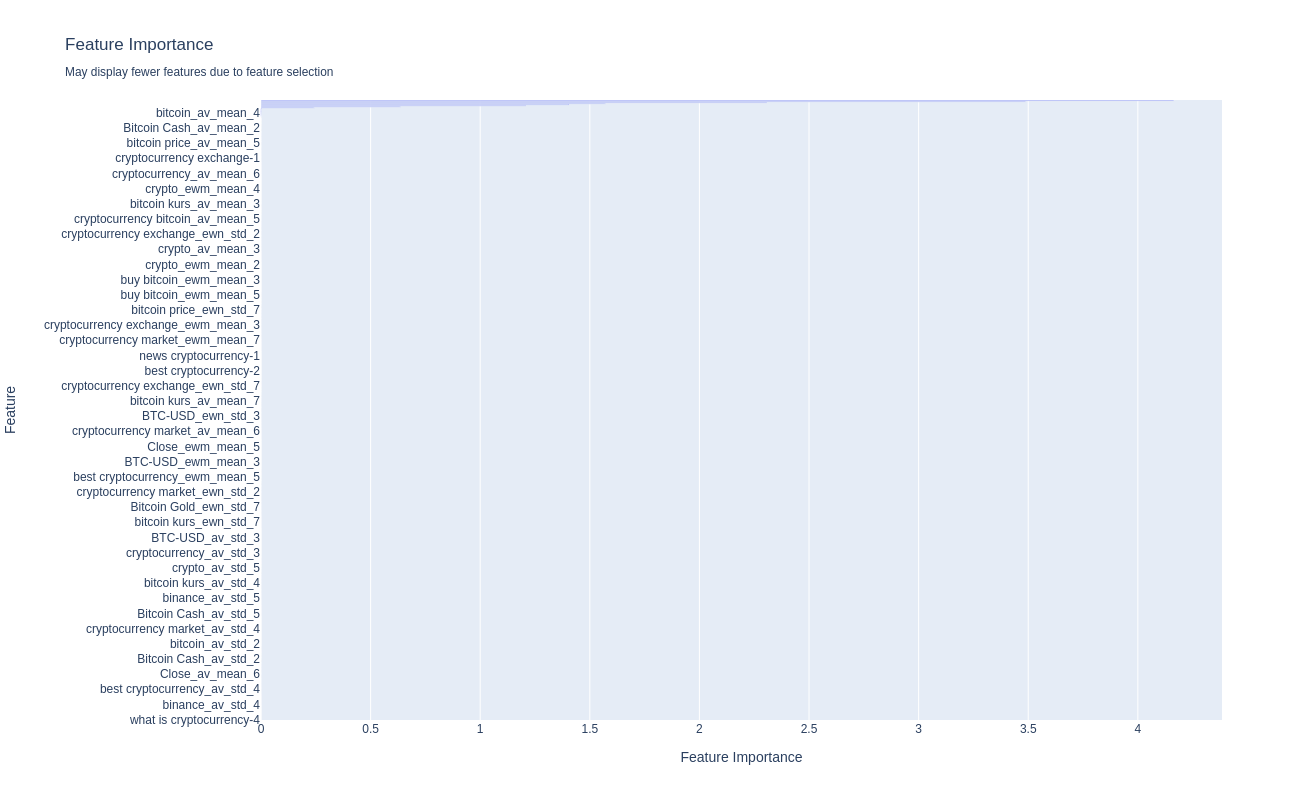

In [98]:
pipeline_0.graph_feature_importance()

In [109]:
pipeline_0.feature_importance.head(20) #[pipeline_0.feature_importance['feature']=='Close-1']

feature    importance
0                Close_av_mean_2  4.164793e+00
1                        Close-1 -3.487412e+00
2                Close_av_mean_3  2.306927e+00
3                Close_av_mean_4  1.570586e+00
4                        Close-2 -1.404768e+00
5                Close_av_mean_5  1.207570e+00
6                        Close-3 -6.353328e-01
7                        Close-4 -2.421378e-01
8              bitcoin_av_mean_2 -3.765965e-03
9                      bitcoin-1  3.154256e-03
10                       bitcoin  3.152487e-03
11             bitcoin_av_mean_3 -2.086652e-03
12             bitcoin_av_mean_4 -1.421243e-03
13                     bitcoin-2  1.271010e-03
14             bitcoin_av_mean_5 -1.093341e-03
15                     bitcoin-3  5.750058e-04
16                     bitcoin-4  2.191930e-04
17       bitcoin stock_av_mean_4 -1.740177e-12
18                 bitcoin price -1.350059e-12
19  buy cryptocurrency_av_mean_2  1.221433e-12

## Figure for real value `y` and predicted on transformed data

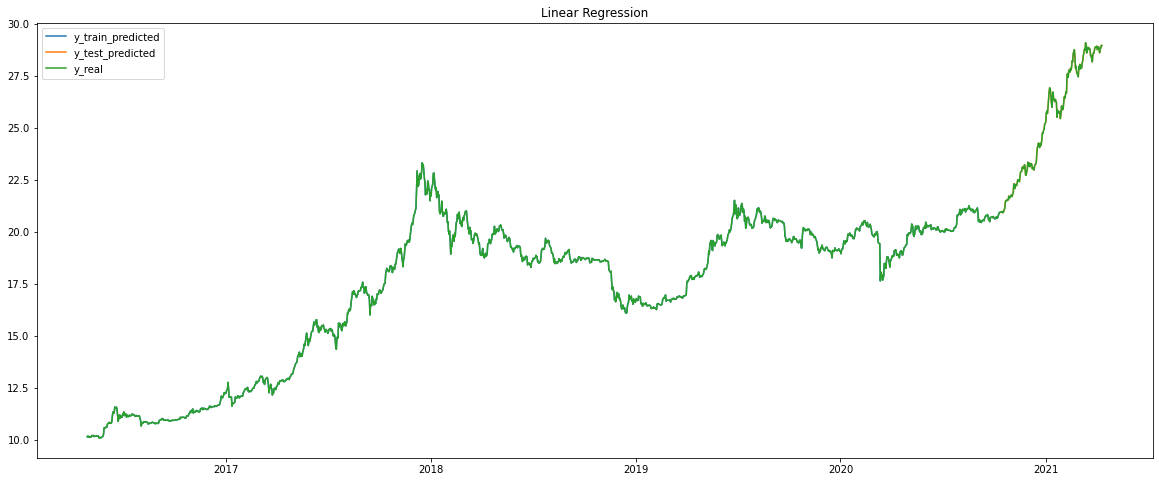

In [68]:
# plots on train and test data
im = show_pred(y_train=prediction_train,
         y_test=prediction_test,
         y=y,
         title='Linear Regression')

In [69]:
im

## Distributions and statisctics for residuals 

In [27]:
error_describing = get_describin_from_residuals(error_train, error_test)
error_describing

train_ressiduals  test_ressiduals
count      1.629000e+03     1.810000e+02
mean      -8.810904e-16     2.694959e-14
std        2.477730e-14     2.172023e-14
min       -1.030287e-13    -3.552714e-14
25%       -1.421085e-14     1.421085e-14
50%        0.000000e+00     2.842171e-14
75%        1.421085e-14     4.263256e-14
max        1.030287e-13     7.815970e-14

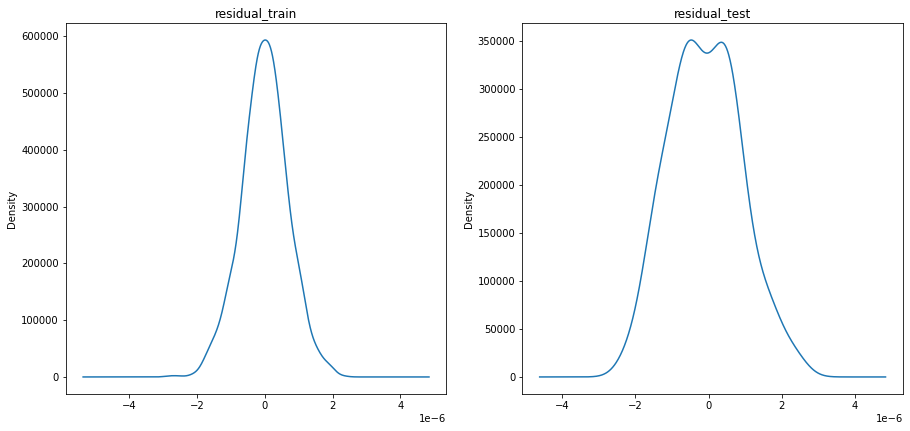

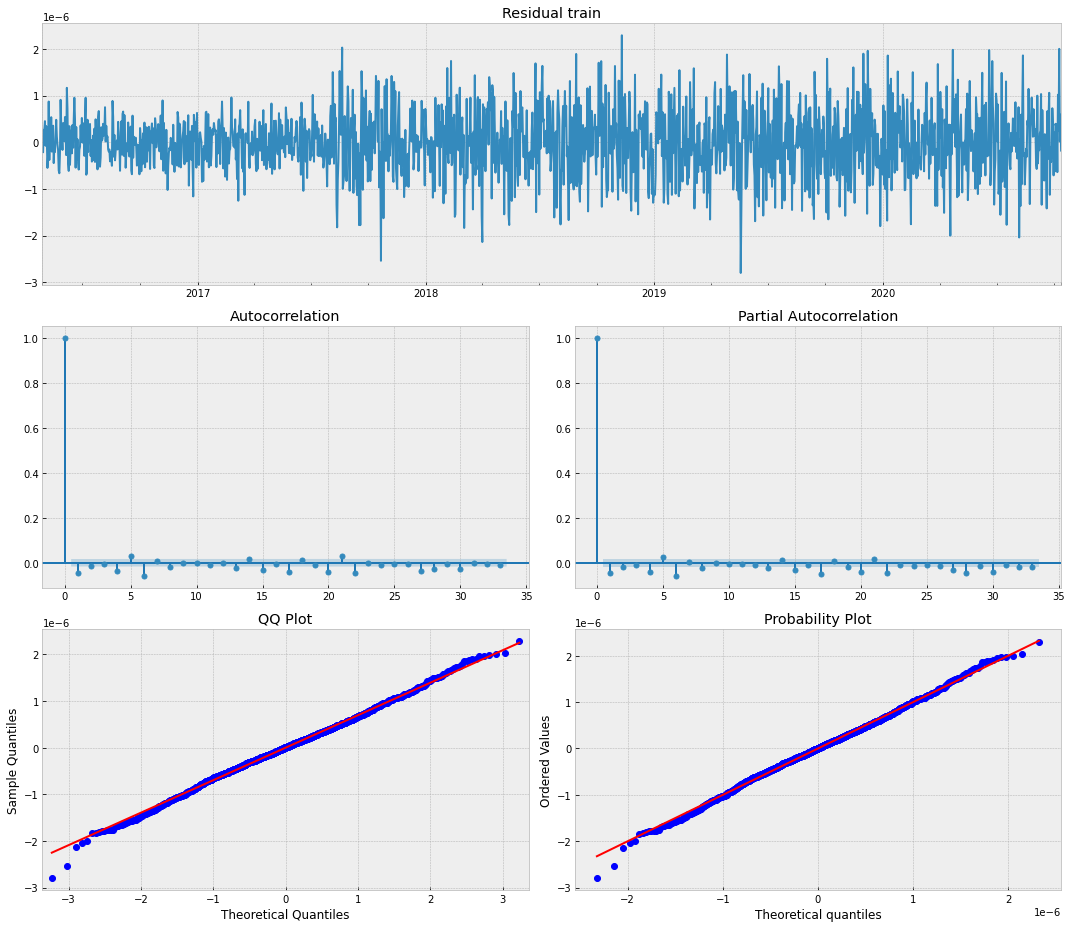

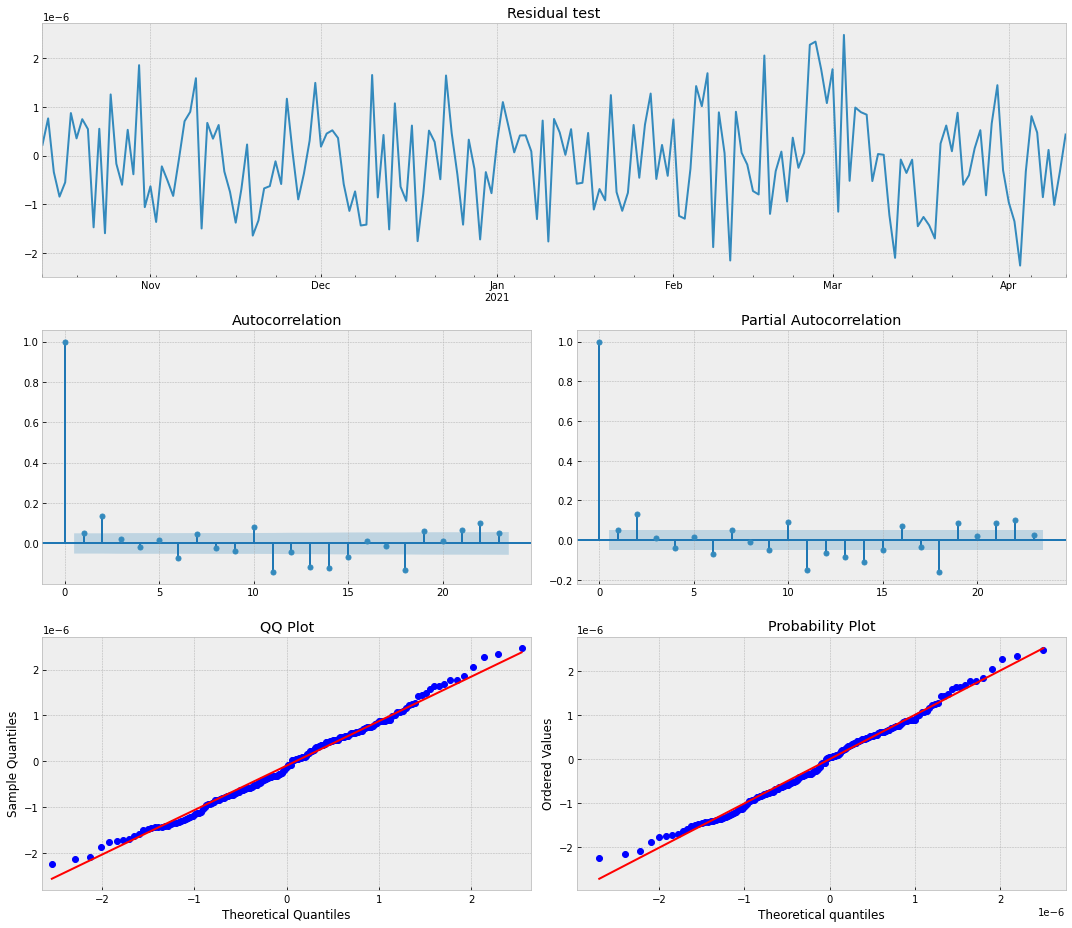

In [44]:
show_train_test_residual(error_train, error_test)

## Come back to real values (retransform) and calculate metrics of predictions and ressiduals

In [99]:
lmbds = pipeline['TranformTimeSeries'].lmbds
lmbds

{'Close': 0.15465264713954702,
 'bitcoin': -0.05355913011004709,
 'bitcoin price': 0.07186518877653043,
 'bitcoin usd': -0.08659169515802233,
 'bitcoin kurs': 0.18552949091020307,
 'Bitcoin.com': 0.16453935837323813,
 'Bitcoin Gold': -0.022737204321266614,
 'BTC-USD': 0.06451642033642298,
 'Bitcoin Cash': 0.23368283100711382,
 'binance': -0.5232379654048963,
 'cryptocurrency': 0.1911488684918063,
 'cryptocurrency bitcoin': 0.14433777747608414,
 'news cryptocurrency': 0.19641884292663886,
 'crypto': 0.06200800626252599,
 'buy bitcoin': -0.38021309713181395,
 'bitcoin stock': 0.1118943862102854,
 'best cryptocurrency': 0.1751901558383232,
 'cryptocurrency market': 0.07442360664057256,
 'buy cryptocurrency': 0.13542917917035247,
 'what is cryptocurrency': 0.24040830359357657,
 'cryptocurrency exchange': 0.1609234577175644}

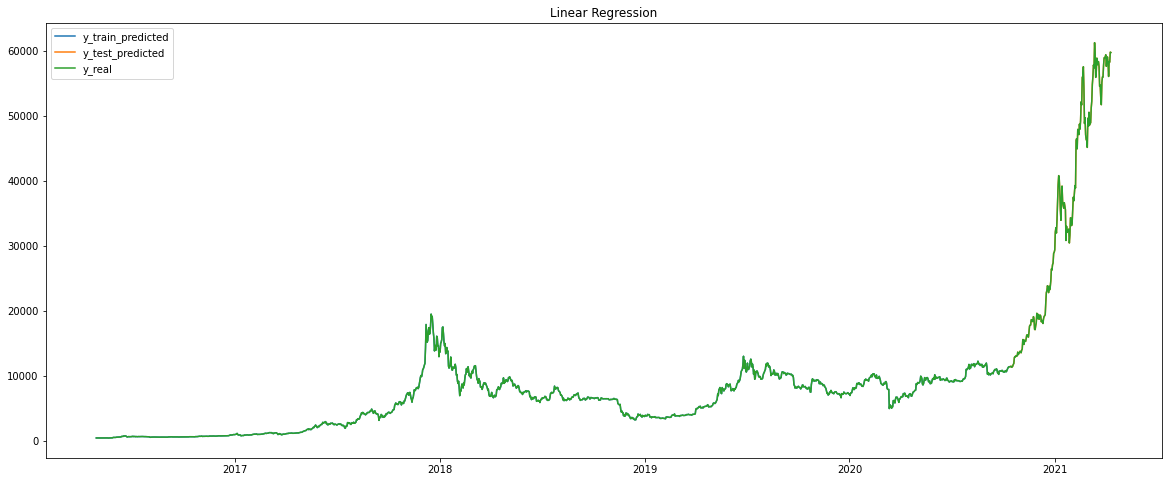

In [46]:
lmbd = lmbds['Close']

inv_y, inv_pred_train, inv_pred_test, inv_error_train, inv_error_train =  inv_boxcox_prediction_and_realvalues(y, prediction_train, prediction_test, lmbd)
y_interpolated = df_resulting['Close'].interpolate('linear')[pd.concat([inv_pred_train, inv_pred_test], axis=0).index]

show_pred(y_train=inv_pred_train,
         y_test=inv_pred_test,
         y=y_interpolated, # df_resulting['Close'],
         title='Linear Regression')

## Metrix for model after retransformin to real values

In [70]:
# Metrix for model after transformin to real values
df_metrix = define_metrics(inv_y, inv_pred_train, inv_pred_test, name='Linar')
df_metrix

name   r2  sum_squared_resid      MAPE      RMSE  durbin_watson  \
0  Linar_train  1.0           0.003070  0.000016  0.001373       0.039814   
0   Linar_test  1.0           0.015668  0.000023  0.009304       0.020301   

    theil_index  ex_var  
0  9.625919e-08     1.0  
0  1.233618e-07     1.0

## Metrix for model with REALvalues of stock market

In [48]:
# Metrix for model after transformin to real values
define_metrics(y_interpolated, inv_pred_train, inv_pred_test, name='Linar')

name   r2  sum_squared_resid      MAPE      RMSE  durbin_watson  \
0  Linar_train  1.0           0.007405  0.000023  0.002132       1.177951   
0   Linar_test  1.0           0.029811  0.000028  0.012834       0.874613   

    theil_index  ex_var  
0  1.494986e-07     1.0  
0  1.701609e-07     1.0

## Distributions and statisctics for residuals after retransformed `y`

In [49]:
error_train, error_test = get_error(y_interpolated, inv_pred_train, inv_pred_test)

error_describing = get_describin_from_residuals(error_train=error_train, error_test=error_test)
error_describing

train_ressiduals  test_ressiduals
count       1629.000000       181.000000
mean           0.001126         0.008510
std            0.001811         0.009633
min           -0.003822        -0.017264
25%            0.000035         0.002002
50%            0.000548         0.006976
75%            0.002141         0.013313
max            0.010217         0.038847

## Confident interaval for test error 

In [50]:
mean, start, end = mean_confidence_interval(error_test)
print(f'interval:\t{(start, end)}')

interval:	(0.007096920659962141, 0.009922693665165055)


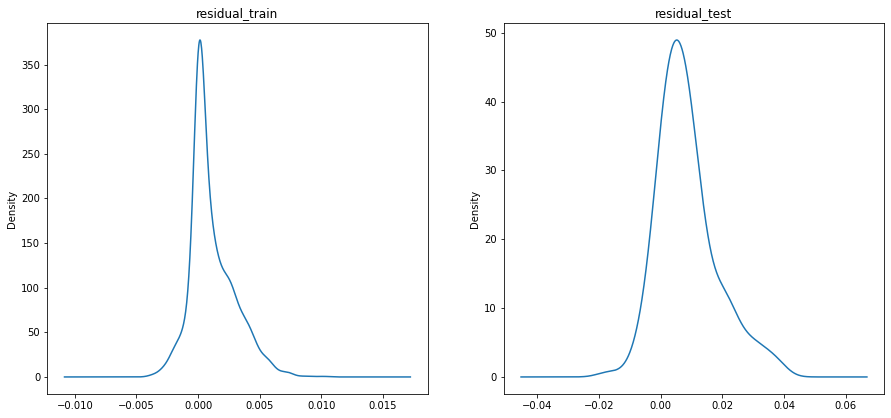

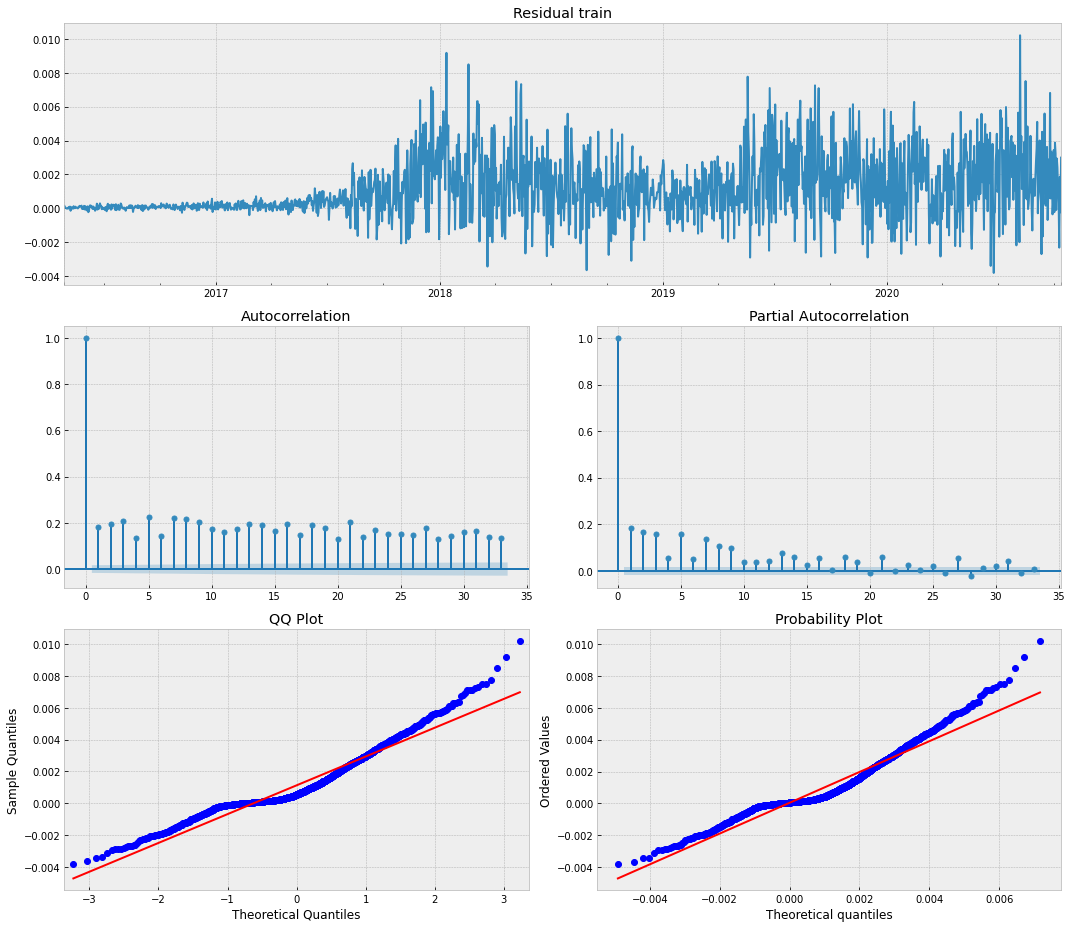

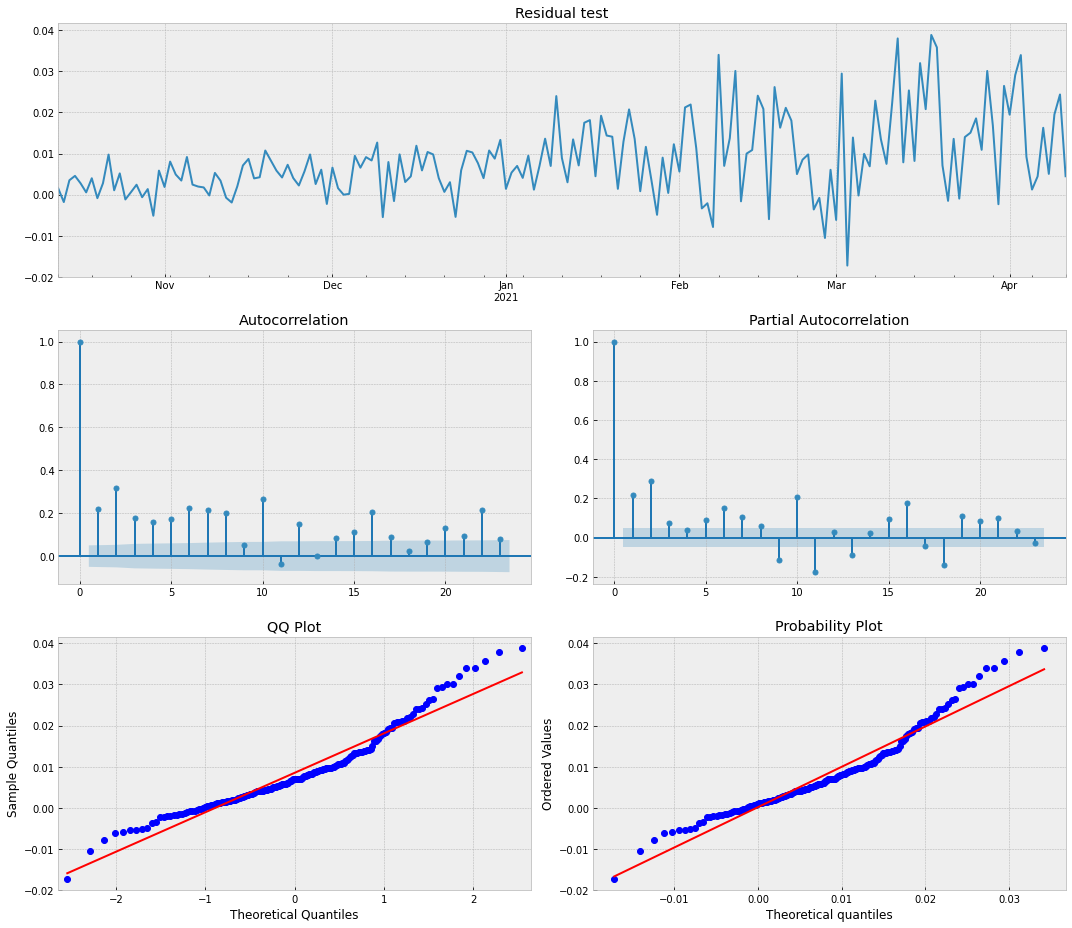

In [51]:
show_train_test_residual(error_train, error_test.dropna())